# Анализ сайта «СберАвтоподписка»

## Описание проекта  

**О компании СберАвтоподписка**

«СберАвтоподписка» — это сервис долгосрочной аренды автомобилей для
физлиц.
Клиент платит фиксированный ежемесячный платёж и получает
в пользование машину на срок от шести месяцев до трёх лет. Также в платёж
включены:
- страхование (КАСКО, ОСАГО, ДСАГО);
- сезонная смена шин и их хранение;
- круглосуточная служба поддержки.  
За дополнительную сумму можно приобрести услугу консьерж-сервиса —
доставку автомобиля до сервисного центра и обратно на техническое
обслуживание, сезонную замену шин, ремонт.

«СберАвтоподписка» предлагает новый для российского рынка способ
владения автомобилем и выступает в качестве альтернативы автокредиту.
Машина — это актив, который быстро теряет в цене, поэтому мы
рекомендуем вкладывать собственные средства в финансовые инструменты,
а автомобиль брать во временное пользование за комфортную сумму
в месяц. 

## Задачи проекта

1. Провести исследование и очистку данных  
2. Выяснить, где конверсия больше: по ограническому или платному трафику.  
3. Выяснить, конверсия в каких регионах больше: в Москве и Санкт-Петербурге, либо по остальным регионам России.

In [1]:
#Импорт модулей
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Загрузка датасетов

In [2]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
# Размеры датасетов
print(df_hits.shape)
print(df_sessions.shape)

(15726470, 11)
(1860042, 18)


In [5]:
# Основная информация по датасетам
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [6]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [9]:
# Процент пропущенных значений по датасетам
def missing_values_check(data):    
    missing_values = data.isnull().sum()
    total_cells = np.product(data.shape)
    total_missing = missing_values.sum()
    missing_percentage = (total_missing / total_cells) * 100
    print(f"Процент пропущенных данных: {missing_percentage:.2f}%")
    
print(missing_values_check(df_hits))
print(missing_values_check(df_sessions))

Процент пропущенных данных: 20.19%
None
Процент пропущенных данных: 14.69%
None


In [10]:
# Подсчет уникальных значений в столбцах
def nunique_for_columns(data):    
    for column_name in data.columns:
        unique_values = data[column_name].nunique()
        print(f"Уникальных значений {column_name}: {unique_values}")
nunique_for_columns(df_sessions)

Уникальных значений session_id: 1860042
Уникальных значений client_id: 1391717
Уникальных значений visit_date: 226
Уникальных значений visit_time: 85318
Уникальных значений visit_number: 537
Уникальных значений utm_source: 293
Уникальных значений utm_medium: 56
Уникальных значений utm_campaign: 412
Уникальных значений utm_adcontent: 286
Уникальных значений utm_keyword: 1219
Уникальных значений device_category: 3
Уникальных значений device_os: 13
Уникальных значений device_brand: 205
Уникальных значений device_model: 104
Уникальных значений device_screen_resolution: 5039
Уникальных значений device_browser: 57
Уникальных значений geo_country: 166
Уникальных значений geo_city: 2548


In [11]:
nunique_for_columns(df_hits)

Уникальных значений session_id: 1734610
Уникальных значений hit_date: 226
Уникальных значений hit_time: 925887
Уникальных значений hit_number: 500
Уникальных значений hit_type: 1
Уникальных значений hit_referer: 37873
Уникальных значений hit_page_path: 342715
Уникальных значений event_category: 52
Уникальных значений event_action: 230
Уникальных значений event_label: 39825
Уникальных значений event_value: 0


### Очистка данных

In [10]:
# Проверка на дубликаты строк:
df_sessions.duplicated().unique()

array([False])

In [11]:
df_hits.duplicated().unique()

array([False])

**Проверка и заполнение пропусков**

In [12]:
# Процент пропущенных значений по признакам
missing_percentage = df_hits.isnull().mean() * 100
print(missing_percentage)

session_id          0.000000
hit_date            0.000000
hit_time           58.247795
hit_number          0.000000
hit_type            0.000000
hit_referer        39.899634
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
event_value       100.000000
dtype: float64


In [13]:
missing_percentage = df_sessions.isnull().mean() * 100
print(missing_percentage)

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64


**Заполнение пропусков в df_hits**

In [14]:
# Пропуски время хита меняем на медиану. Медиана нечувствительна к выбросам.
df_hits['hit_time'].fillna(df_hits['hit_time'].median(), inplace=True)

In [15]:
# Создаем функцию заполнения пропусков модой в категориальных признаках:
def fill_missing_with_mode(df, columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

In [16]:
# Создаем список категориальных признаков, где есть пропуски и применяем к ним функцию заполнения модой:
columns_to_fill = ['hit_referer', 'event_label']
df_hits = fill_missing_with_mode(df_hits, columns_to_fill)

In [17]:
# Удаляем пустую колонку event_value
df_hits.drop(columns='event_value', inplace=True)

In [18]:
# Проверяем процент пропущенных значений после заполнения:
missing_percentage = df_hits.isnull().mean() * 100
print(missing_percentage)

session_id        0.0
hit_date          0.0
hit_time          0.0
hit_number        0.0
hit_type          0.0
hit_referer       0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
event_label       0.0
dtype: float64


**Заполнение пропусков в df_sessions**

In [19]:
# Создаем список категориальных признаков, где есть пропуски и применяем к ним функцию заполнения модой:
columns_to_fill = ['utm_campaign', 'utm_source', 'utm_adcontent', 'utm_keyword', 'device_os', 'device_brand']
df_sessions = fill_missing_with_mode(df_sessions, columns_to_fill)

В колонке device_model 99% пропущенных значений. Эту колонку удаляем

In [20]:
df_sessions.drop(columns='device_model', inplace=True)

In [21]:
# Проверяем процент пропущенных значений после заполнения:
missing_percentage = df_sessions.isnull().mean() * 100
print(missing_percentage)

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
utm_keyword                 0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64


**Преобразование колонки hit_page_path**  
Информация о модели автомобиля содержится после cars/. Все, что до /cars/, можно удалить.   
Дополнительные параметры ссылок нам не нужны, поэтому знак '?' и все, что после него можно тоже убрать. Все остальные ссылки, где нет раздела cars, меняем на значение 'other page' - сюда входят главная страница сайта и все другие страницы, не связанные   
с определенной моделью авто.

In [22]:
# Функция преобразования признака с информацией об автомобилях
def extract_car_info(page_path):
    if 'cars' not in page_path:
        page_path = 'other page'
    else:
        page_path = page_path.split('cars')[-1]
    if 'all' in page_path:
        page_path = page_path.split('all')[-1]
    if '?' in page_path:
        page_path = page_path.split('?')[0]
    page_path = page_path.replace('/', ' ')
    if '&' in page_path:
        page_path = 'other page'
    return page_path

# Применяем функцию к признаку 'hit_page_path'
df_hits['car_info'] = df_hits['hit_page_path'].apply(extract_car_info)

df_hits.head(20)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,car_info
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit,
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,KclpemfoHstknWHFiLit,fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,KclpemfoHstknWHFiLit,volkswagen polo e994838f
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit,
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit,mercedes-benz cla-klasse c917af36
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,KclpemfoHstknWHFiLit,
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,KclpemfoHstknWHFiLit,toyota
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,KclpemfoHstknWHFiLit,mercedes-benz glc f8f3304e
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,KclpemfoHstknWHFiLit,kia sorento c38179cb
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,KclpemfoHstknWHFiLit,nissan x-trail 0744675f


In [23]:
df_hits['car_info'].value_counts()

car_info
                            4167123
other page                  3326476
 skoda rapid bf24b977        441084
 bf24b977                    427224
 lada-vaz vesta 2fc745ed     401246
                             ...   
 8016868f                         1
 70a37d9a                         1
 2eb8ab4d                         1
 opel meriva                      1
 dacia                            1
Name: count, Length: 2831, dtype: int64

Видно, что в признаке car_info содержатся пустые значения, которые технически не NaN, но это могут быть значения с пробелами, которые могли образоваться в результате преобразования. Заменяем пробелы значения на 'other page' и проверяем результат:

In [24]:
df_hits['car_info'] = df_hits['car_info'].replace({'': 'other page', ' ': 'other page'})
df_hits['car_info'].value_counts()

car_info
other page                  7493637
 skoda rapid bf24b977        441084
 bf24b977                    427224
 lada-vaz vesta 2fc745ed     401246
 f28947a1                    377770
                             ...   
 peugeot expert                   1
 volvo v60-cross-country          1
 nissan cherokee                  1
 skoda 5-serii                    1
 dacia                            1
Name: count, Length: 2829, dtype: int64

In [25]:
# Удаляем исходный признак 'hit_page_path'
df_hits.drop(columns='hit_page_path', inplace=True)

**Типизация данных**

Преобразуем признаки датасета df_hits в следующие типы:    
hit_date - datetime  
hit_time - float  
hit_number - int 

In [26]:
df_hits['hit_date'] = pd.to_datetime(df_hits['hit_date'])
df_hits['hit_time'] = df_hits['hit_time'].astype(float)
df_hits['hit_number'] = df_hits['hit_number'].astype(int)

In [27]:
# Проверяем результат преобразования:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   hit_date        datetime64[ns]
 2   hit_time        float64       
 3   hit_number      int32         
 4   hit_type        object        
 5   hit_referer     object        
 6   event_category  object        
 7   event_action    object        
 8   event_label     object        
 9   car_info        object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 1.1+ GB


Преобразуем признаки датасета df_sessions в следующие типы:  
visit_date - datetime  
visit_time - datetime.time

In [28]:
df_sessions['visit_date'] = pd.to_datetime(df_sessions['visit_date'])
df_sessions = df_sessions.copy()
df_sessions['visit_time'] = pd.to_datetime(df_sessions['visit_time'], format='%H:%M:%S')

In [29]:
# Проверяем результат преобразования:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_screen_resolution  object        
 14  device_browser            object        
 15  geo_country               object        
 16  geo_city                  object        
dtypes: datet

##  Решение задач анализа данных 

Для решения задачи анализа данных необходимо выполнить предварительные действия по подготовке данных, а именно:  

1) Объединить данные по признаку session_id, чтобы получить информацию по конверсиям в разрезе источников трафика и других сегментов.  
2) Сгенерировать признак c коэффициентом конверсии. Где совершено целевое действие - конверсия 100%. Где не совершено - 0.   
3) Сгенерировать признак "канал" со значениями "органический" и "платный"  
4) Сгенерировать признак по городам присутствия со значениями "город присутствия" и "другие"  
5) Сгенерировать признак по соцсетям со значениями: "соцсети" и "другие"

В представленных датасетах имеется общий признак: session_id. По данному признаку следует объединить датасеты для дальнейшего исследования:

In [30]:
# Проверяем исходные размеры датасетов
df_hits.shape

(15726470, 10)

In [31]:
df_sessions.shape

(1860042, 17)

In [32]:
# Объединяем датасеты методом merge по признаку session_id:
merged_dataset = pd.merge(df_hits, df_sessions, on='session_id')
print(f"Размер итогового датасета: {merged_dataset.shape[0]} строк")
print(f"Потеря данных от исходного размера df_hits: {(df_hits.shape[0] - merged_dataset.shape[0]) /df_hits.shape[0] *100 } %")

Размер итогового датасета: 15685219 строк
Потеря данных от исходного размера df_hits: 0.26230298344129355 %


Потери данных при объединении датасетов несущественны и не повлияют на конечный результат.

In [33]:
merged_dataset.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,event_category,event_action,event_label,car_info,...,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,other page,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
1,5639623078712724064.1640254056.1640254056,2021-12-23,290095.0,12,event,HbolMJUevblAbkHClEQa,card_web,view_new_card,KclpemfoHstknWHFiLit,kia seltos 20f30855,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
2,5639623078712724064.1640254056.1640254056,2021-12-23,294857.0,18,event,HbolMJUevblAbkHClEQa,card_web,view_new_card,KclpemfoHstknWHFiLit,volkswagen tiguan 0208cd2b,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
3,5639623078712724064.1640254056.1640254056,2021-12-23,295591.0,20,event,HbolMJUevblAbkHClEQa,card_web,view_new_card,KclpemfoHstknWHFiLit,volkswagen tiguan 0208cd2b,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
4,5639623078712724064.1640254056.1640254056,2021-12-23,290039.0,8,event,HbolMJUevblAbkHClEQa,card_web,view_new_card,KclpemfoHstknWHFiLit,kia seltos 20f30855,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg


**Генерация дополнительного признака с коэффициентом конверсии**   
Согласно Глоссария, целевыми действиями следует считать определенный перечень значений event_action. Целевое действие считается 
случившимся, если зафиксировано одно из этих событий.   
Генерируем признак conversion_rate:

In [34]:
# Список целевых действий, взятый из описания:
event_action_list =  ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
                      'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 
                      'sub_submit_success', 'sub_car_request_submit_click']

In [35]:
merged_dataset['conversion_rate'] = 0
merged_dataset.loc[merged_dataset['event_action'].isin(event_action_list), 'conversion_rate'] = 100

In [36]:
utm_medium_organic_list = ['organic', 'referral', '(none)']
merged_dataset['channel'] = 'paid'
merged_dataset.loc[merged_dataset['utm_medium'].isin(utm_medium_organic_list), 'channel'] = 'organic'

**Генерация дополнительного признака с городами присутствия**  
Необходимо создать признак city_presence, который будет содержать два значения: город присуствия - mskreg_spb  
и другие города - others.  
Для сортировки этого признака создал список с городами, куда входят Москва, Питер и города Московской области, найденные в  
признаке geo_city

In [37]:
presence_list = ['Saint Petersburg', 'Moscow', 'Podolsk', 'Korolyov', 'Kolomna', 'Naro-Fominsk', 'Dzerzhinsky',
                 'Krasnoznamensk', 'Krasnogorsk', 'Balashikha', 'Sergiyev Posad', 'Dmitrov', 'Odintsovo', 'Lobnya',
                 'Kotelniki', 'Mytishchi', 'Zheleznodorozhny', 'Shchyolkovo', 'Vidnoye', 'Khimki', 'Lyubertsy',
                 'Domodedovo', 'Staraya Kupavna', 'Lytkarino', 'Klin', 'Pushkino', 'Nakhabino', 'Ramenskoye', 
                 'Solnechnogorsk', 'Ivanteyevka', 'Aprelevka', 'Elektrostal', 'Lukhovitsy', 'Pavlovsky Posad',
                 'Chernogolovka', 'Zhukovskiy', 'Istra', 'Tomilino', 'Ruza', 'Krasnoarmeysk', 'Voskresensk',
                 'Zvenigorod', 'Dolgoprudny', 'Stupino', 'Reutov', 'Orekhovo-Zuyevo', 'Fryazino', 'Losino-Petrovsky',
                 'Chekhov', 'Selyatino', 'Volokolamsk', 'Dzerzhinsk', 'Protvino', 'Shatura', 'Elektrougli']

In [38]:
merged_dataset['city_presence'] = 'others'
merged_dataset.loc[merged_dataset['geo_city'].isin(presence_list), 'city_presence'] = 'mskreg_spb'

**Генерация дополнительного признака с соцсетями**  
В задании необходимо оценить потенциал соцсетей для дальнейшего масштабирования рекламы. Чтобы понять, что в данных относится к  соцсетям, а что нет, создадим признак social, который будет содержать два значения: social_net и others.

In [39]:
# Список значений utm_source, которые относятся к соцсетям (взято из описания):
utm_sourse_social_list = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 
                          'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [40]:
merged_dataset['social'] = 'others'
merged_dataset.loc[merged_dataset['utm_source'].isin(utm_sourse_social_list), 'social'] = 'social_net'

### Проверка гипотезы: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

**Проверка гипотезы с помощью Z-теста**

In [41]:
# Группируем данные по типу трафика и вычисляем средние значения Conversion Rate
grouped_df = merged_dataset.groupby('channel')['conversion_rate'].mean()

# Получаем Conversion Rate для органического и платного трафика
organic_cr = grouped_df['organic']
paid_cr = grouped_df['paid']

# Вычисляем размеры выборок для каждой группы
n_organic = merged_dataset['channel'].value_counts()['organic']
n_paid = merged_dataset['channel'].value_counts()['paid']

# Вычисляем стандартные ошибки для каждой группы
se_organic = (organic_cr * (1 - organic_cr) / n_organic) ** 0.5
se_paid = (paid_cr * (1 - paid_cr) / n_paid) ** 0.5

# Вычисляем Z-значение для разницы между долями
z_value = (organic_cr - paid_cr) / ((se_organic ** 2 + se_paid ** 2) ** 0.5)

# Задаем уровень значимости
alpha = 0.05

# Вычисляем критическое значение Z для заданного уровня значимости
z_critical = st.norm.ppf(1 - alpha / 2)

# Проверяем статистическую значимость различий между долями
if abs(z_value) > z_critical:
    print("Различие между Conversion Rate органического и платного трафика статистически значимо.")
else:
    print("Различие между Conversion Rate органического и платного трафика не является статистически значимым.")

Различие между Conversion Rate органического и платного трафика статистически значимо.


**Проверка гипотезы методом Хи-квадрат**

In [42]:
# Создаем таблицу сопряженности для органического и платного трафика
contingency_table = pd.crosstab(merged_dataset['channel'], merged_dataset['conversion_rate'])

# Вычисляем хи-квадрат статистику и p-value
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Проверяем статистическую значимость различий между группами
if p_value < alpha:
    print("Различие между Conversion Rate органического и платного трафика статистически значимо.")
else:
    print("Различие между Conversion Rate органического и платного трафика не является статистически значимым.")

Различие между Conversion Rate органического и платного трафика статистически значимо.


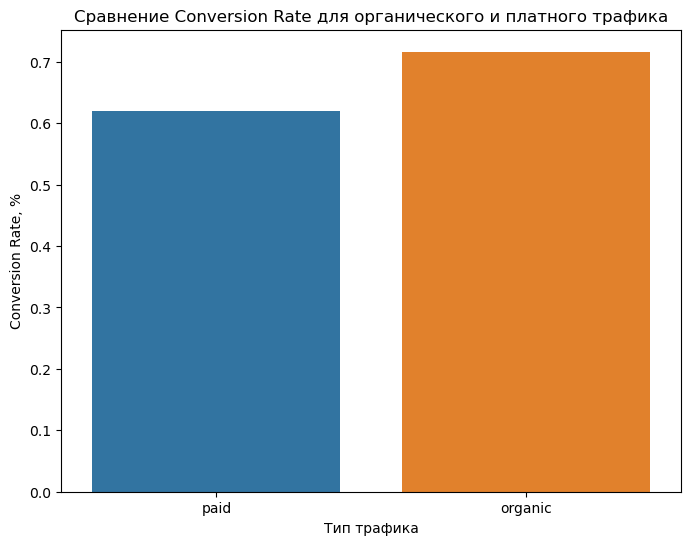

In [43]:
# Визуализация коэффициента конверсии органического и платного трафика
plt.figure(figsize=(8, 6))
sns.barplot(x='channel', y='conversion_rate', data=merged_dataset, ci=None)
plt.xlabel('Тип трафика')
plt.ylabel('Conversion Rate, %')
plt.title('Сравнение Conversion Rate для органического и платного трафика')
plt.show()

### Проверка гипотезы: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

**Проверка гипотезы с помощью Z-теста**

In [44]:
# Группируем данные по типу устройства и вычисляем средние значения Conversion Rate
grouped_df = merged_dataset.groupby('device_category')['conversion_rate'].mean()

# Получаем Conversion Rate для мобильных и десктопных устройств
mobile_cr = grouped_df['mobile']
desktop_cr = grouped_df['desktop']

# Вычисляем размеры выборок для каждой группы
n_mobile = merged_dataset['device_category'].value_counts()['mobile']
n_desktop = merged_dataset['device_category'].value_counts()['desktop']

# Вычисляем стандартные ошибки для каждой группы
se_mobile = (mobile_cr * (1 - mobile_cr) / n_mobile) ** 0.5
se_desktop = (desktop_cr * (1 - desktop_cr) / n_desktop) ** 0.5

# Вычисляем Z-значение для разницы между долями
z_value = (mobile_cr - desktop_cr) / ((se_mobile ** 2 + se_desktop ** 2) ** 0.5)

# Проверяем статистическую значимость различий между долями
if abs(z_value) > z_critical:
    print("Различие между Conversion Rate мобильных и десктопных устройств статистически значимо.")
else:
    print("Различие между Conversion Rate мобильных и десктопных устройств не является статистически значимым.")

Различие между Conversion Rate мобильных и десктопных устройств статистически значимо.


**Проверка гипотезы методом Хи-квадрат**

In [45]:
# Фильтруем данные, оставляя только мобильные и десктопные устройства
filtered_data = merged_dataset[(merged_dataset['device_category'] == 'mobile') | (merged_dataset['device_category'] == 'desktop')]

# Вычисляем хи-квадрат статистику и p-value напрямую без создания отдельной таблицы сопряженности
chi2, p_value, _, _ = st.chi2_contingency(pd.crosstab(filtered_data['device_category'], \
                                                      filtered_data['conversion_rate'], margins=False))

# Проверяем статистическую значимость различий между группами
if p_value < alpha:
    print("Различие между Conversion Rate мобильного и десктопного трафика статистически значимо.")
else:
    print("Различие между Conversion Rate мобильного и десктопного трафика не является статистически значимым.")

Различие между Conversion Rate мобильного и десктопного трафика статистически значимо.


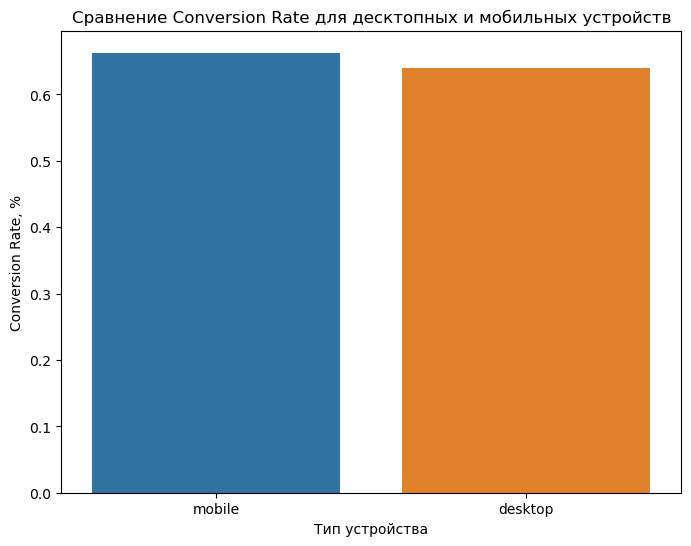

In [46]:
# Визуализация коэффициента конверсии с десктопных и мобильных устройств
plt.figure(figsize=(8, 6))
sns.barplot(x='device_category', y='conversion_rate', data=filtered_data, ci=None)
plt.xlabel('Тип устройства')
plt.ylabel('Conversion Rate, %')
plt.title('Сравнение Conversion Rate для десктопных и мобильных устройств')
plt.show()

### Проверка гипотезы: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события. 

**Проверка гипотезы с помощью Z-теста**

In [47]:
# Группируем данные по городам присутствия и вычисляем средние значения Conversion Rate
grouped_df = merged_dataset.groupby('city_presence')['conversion_rate'].mean()

# Получаем Conversion Rate для мобильных и десктопных устройств
presense_cr = grouped_df['mskreg_spb']
others_cr = grouped_df['others']

# Вычисляем размеры выборок для каждой группы
n_presense = merged_dataset['city_presence'].value_counts()['mskreg_spb']
n_others = merged_dataset['city_presence'].value_counts()['others']

# Вычисляем стандартные ошибки для каждой группы
se_presense = (presense_cr * (1 - presense_cr) / n_presense) ** 0.5
se_others = (others_cr * (1 - others_cr) / n_others) ** 0.5

# Вычисляем Z-значение для разницы между долями
z_value = (presense_cr - others_cr) / ((se_presense ** 2 + se_others ** 2) ** 0.5)

# Проверяем статистическую значимость различий между долями
if abs(z_value) > z_critical:
    print("Различие между Conversion Rate в городах присутствия и остальных городах статистически значимо.")
else:
    print("Различие между Conversion Rate в городах присутствия и остальных городах не является статистически значимым.")

Различие между Conversion Rate в городах присутствия и остальных городах статистически значимо.


**Проверка гипотезы методом Хи-квадрат**

In [48]:
# Создаем таблицу сопряженности для городов присутствия и других городов
contingency_table = pd.crosstab(merged_dataset['city_presence'], merged_dataset['conversion_rate'])

# Вычисляем хи-квадрат статистику и p-value
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Проверяем статистическую значимость различий между группами
if p_value < alpha:
    print("Различие между Conversion Rate в городах присутствия и других городах статистически значимо.")
else:
    print("Различие между Conversion Rate в городах присутствия и других городах не является статистически значимым.")

Различие между Conversion Rate в городах присутствия и других городах статистически значимо.


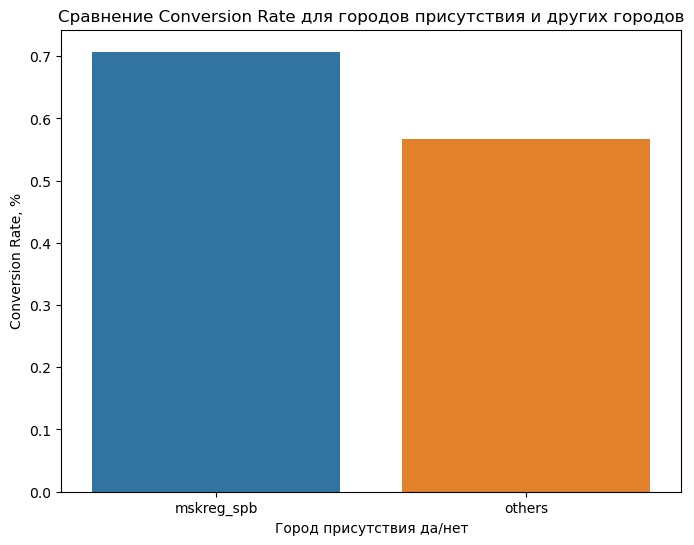

In [49]:
# Визуализация коэффициента конверсии с городов присутствия и других городов
plt.figure(figsize=(8, 6))
sns.barplot(x='city_presence', y='conversion_rate', data=filtered_data, ci=None)
plt.xlabel('Город присутствия да/нет')
plt.ylabel('Conversion Rate, %')
plt.title('Сравнение Conversion Rate для городов присутствия и других городов')
plt.show()

### Выводы по проверке гипотез

Все три гипотезы проверены двумя разными способами с уровнем значимости 0,05 и получены следующие результаты:

1. Различие между CR органического трафика и CR платного трафика статистически значимо. CR огранического трафика выше, чем CR платного трафика.

2. Различие между CR мобильных устройств и CR десктопных устройств статистически значимо. CR мобильных устройств выше, чем CR десктопных устройств.

3. Различие между CR городов присутствия: Москва и область, Санкт-Петербург и CR остальных городов статистически значимо. Конверсия из городов присутствия выше, чем конверсия остальных городов.

## Ответы на вопросы продуктовой команды

**1) Определение источников целевого трафика**

**Топ 10 рекламных кампаний по количеству трафика:**

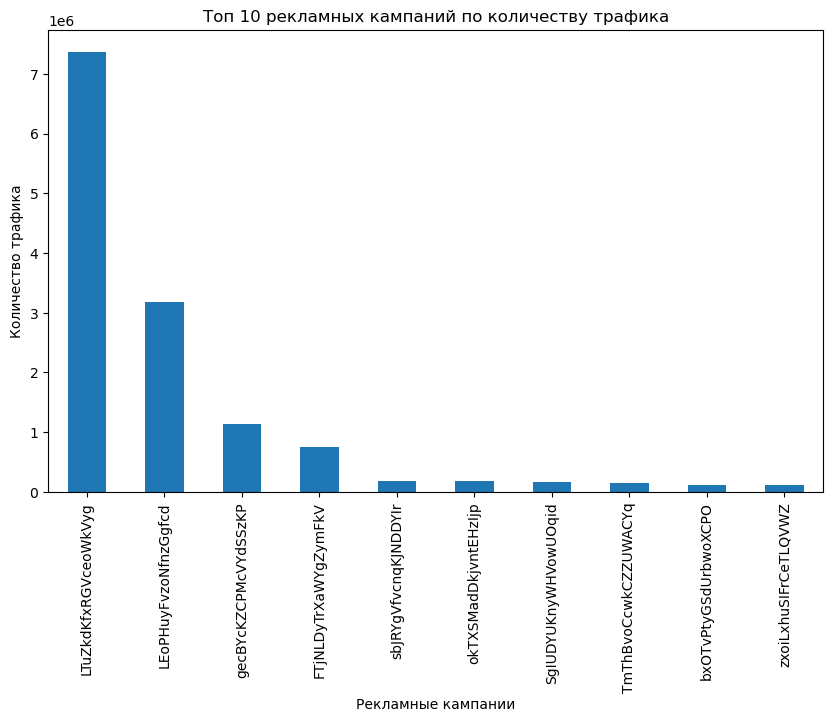

In [50]:
grouped_df_campain_traff = merged_dataset.groupby(['utm_campaign'])['client_id'].count().sort_values(ascending=False)
grouped_df_campain_traff = grouped_df_campain_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_campain_traff.plot(kind='bar')
plt.xlabel('Рекламные кампании')
plt.ylabel('Количество трафика')
plt.title('Топ 10 рекламных кампаний по количеству трафика')
plt.show()

**Топ 10 рекламных кампаний по коэффициенту конверсии:**

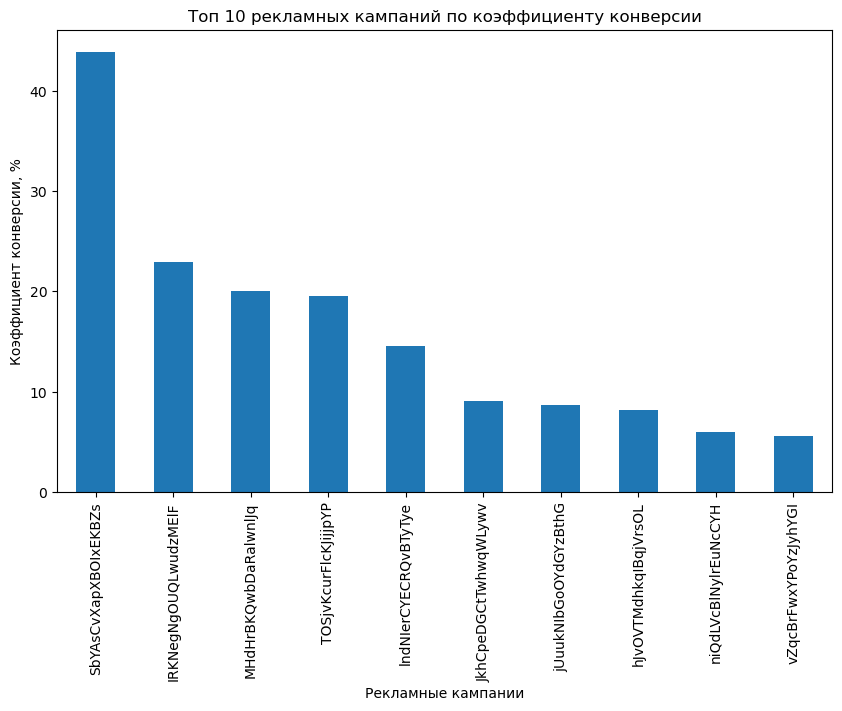

In [51]:
grouped_df_campain_cr = merged_dataset.groupby(['utm_campaign'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_campain_cr = grouped_df_campain_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_campain_cr.plot(kind='bar')
plt.xlabel('Рекламные кампании')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Топ 10 рекламных кампаний по коэффициенту конверсии')
plt.show()

**Топ 10 брендов устройств в порядке убывания трафика**

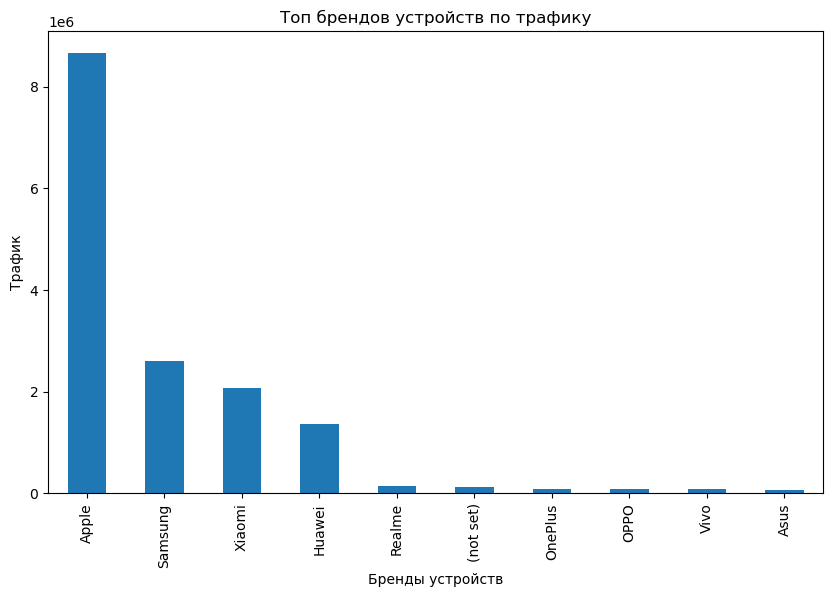

In [52]:
grouped_df_devicebrands_traff = merged_dataset.groupby(['device_brand'])['client_id'].count().sort_values(ascending=False)
grouped_df_devicebrands_traff = grouped_df_devicebrands_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_devicebrands_traff.plot(kind='bar')
plt.xlabel('Бренды устройств')
plt.ylabel('Трафик')
plt.title('Топ брендов устройств по трафику')
plt.show()

**Топ 10 брендов устройств по коэффициенту конверсии**

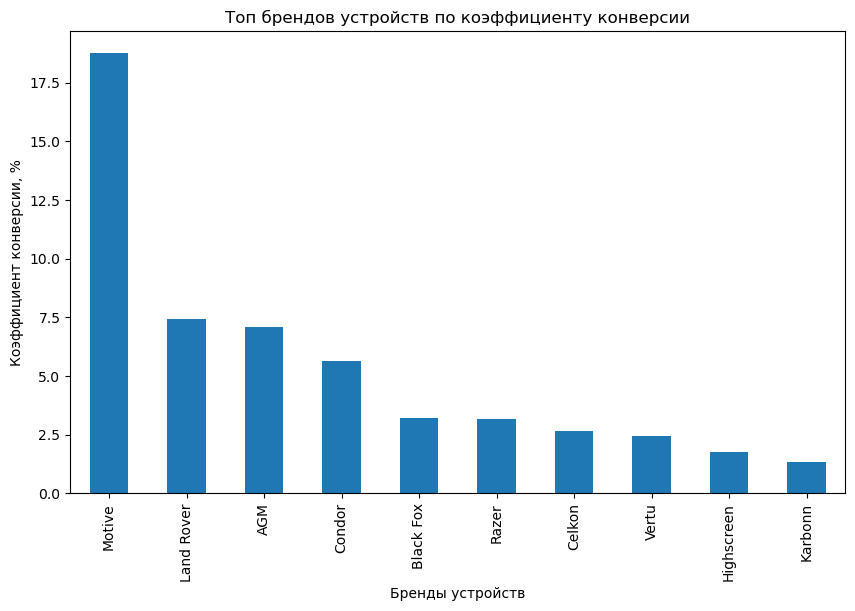

In [53]:
grouped_df_devicebrands_cr = merged_dataset.groupby(['device_brand'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_devicebrands_cr = grouped_df_devicebrands_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_devicebrands_cr.plot(kind='bar')
plt.xlabel('Бренды устройств')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Топ брендов устройств по коэффициенту конверсии')
plt.show()

**Топ 10 городов по количеству трафика**

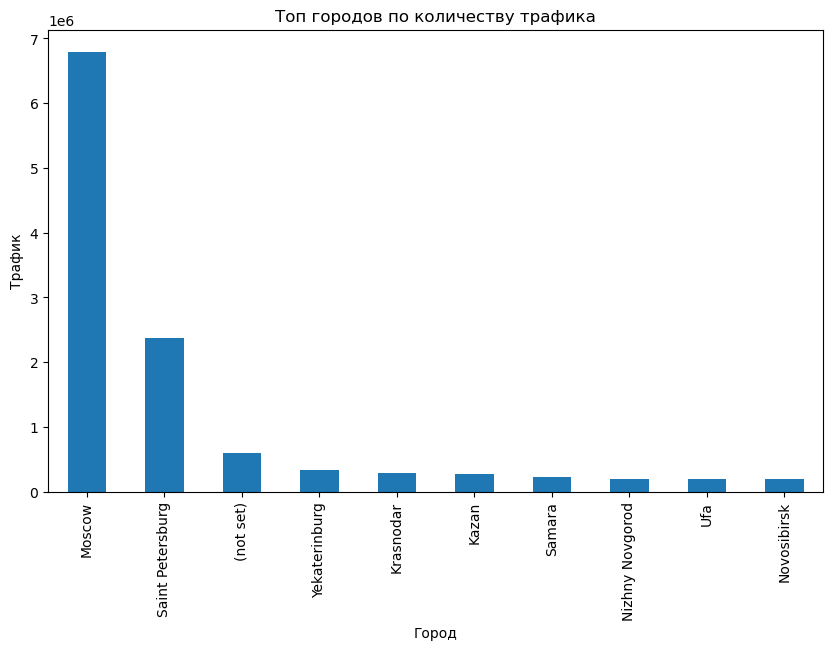

In [54]:
grouped_df_cities_traff = merged_dataset.groupby(['geo_city'])['client_id'].count().sort_values(ascending=False)
grouped_df_cities_traff = grouped_df_cities_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_cities_traff.plot(kind='bar')
plt.xlabel('Город')
plt.ylabel('Трафик')
plt.title('Топ городов по количеству трафика')
plt.show()

**Топ 10 городов по коэффициенту конверсии**

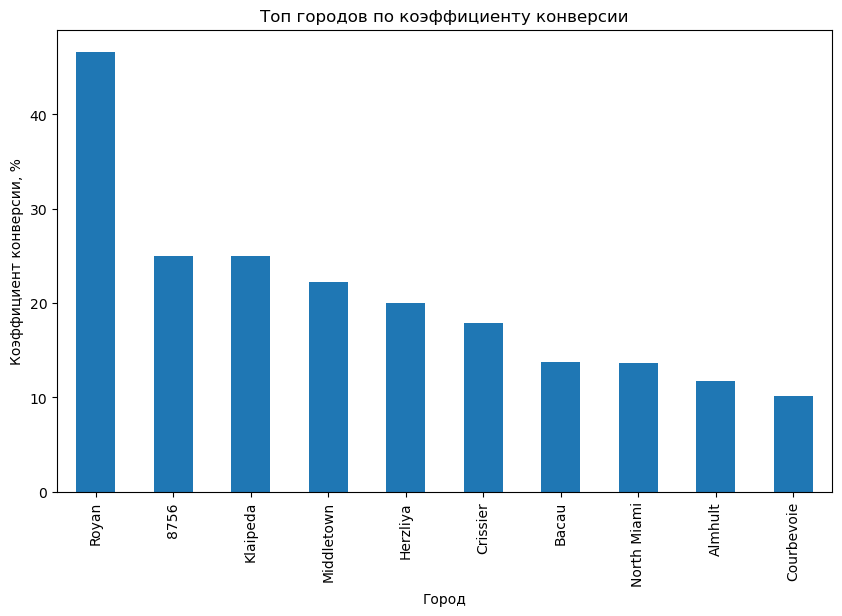

In [55]:
grouped_df_cities_cr = merged_dataset.groupby(['geo_city'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_cities_cr = grouped_df_cities_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_cities_cr.plot(kind='bar')
plt.xlabel('Город')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Топ городов по коэффициенту конверсии')
plt.show()

**Топ 10 стран по количеству трафика**

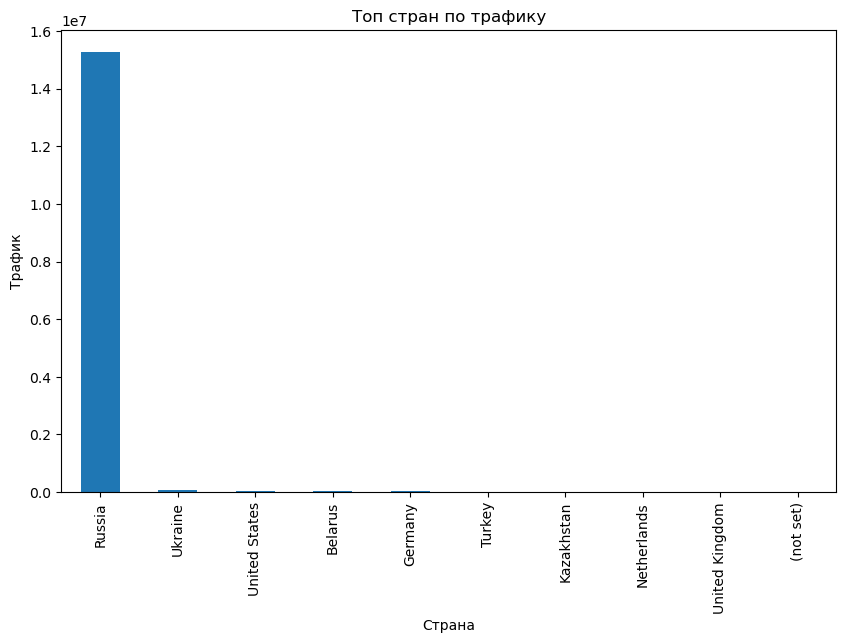

In [56]:
grouped_df_country_traff = merged_dataset.groupby(['geo_country'])['client_id'].count().sort_values(ascending=False)
grouped_df_country_traff = grouped_df_country_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_traff.plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Трафик')
plt.title('Топ стран по трафику')
plt.show()

**Топ 10 стран кроме России по количеству трафика**

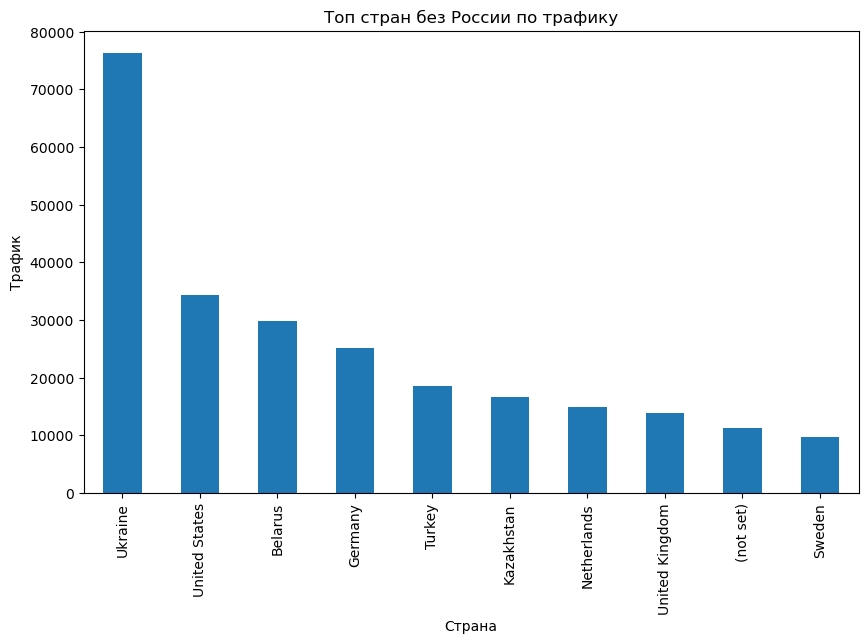

In [57]:
grouped_df_country_traff_withoutr = merged_dataset[merged_dataset['geo_country'] != 'Russia'].groupby(['geo_country'])\
['client_id'].count().sort_values(ascending=False)
grouped_df_country_traff_withoutr = grouped_df_country_traff_withoutr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_traff_withoutr.plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Трафик')
plt.title('Топ стран без России по трафику')
plt.show()

**Топ 10 стран по коэффициенту конверсии**

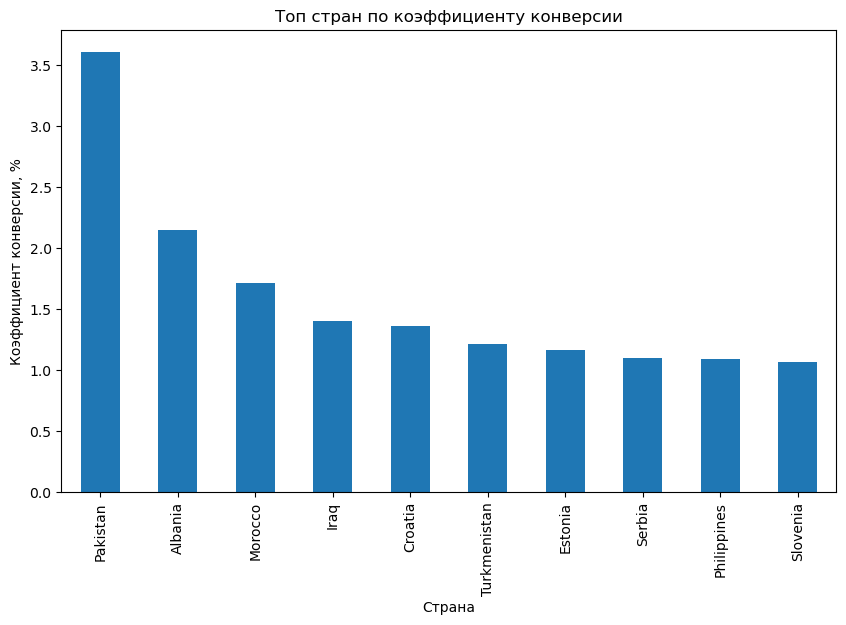

In [58]:
grouped_df_country_cr = merged_dataset.groupby(['geo_country'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_country_cr = grouped_df_country_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_cr.plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Топ стран по коэффициенту конверсии')
plt.show()

**2) Определение моделей авто, пользующихся наибольшим спросом и авто, по которым больше коэффициент конверсии**

**Топ 10 моделей машин с наибольшим количеством трафика**

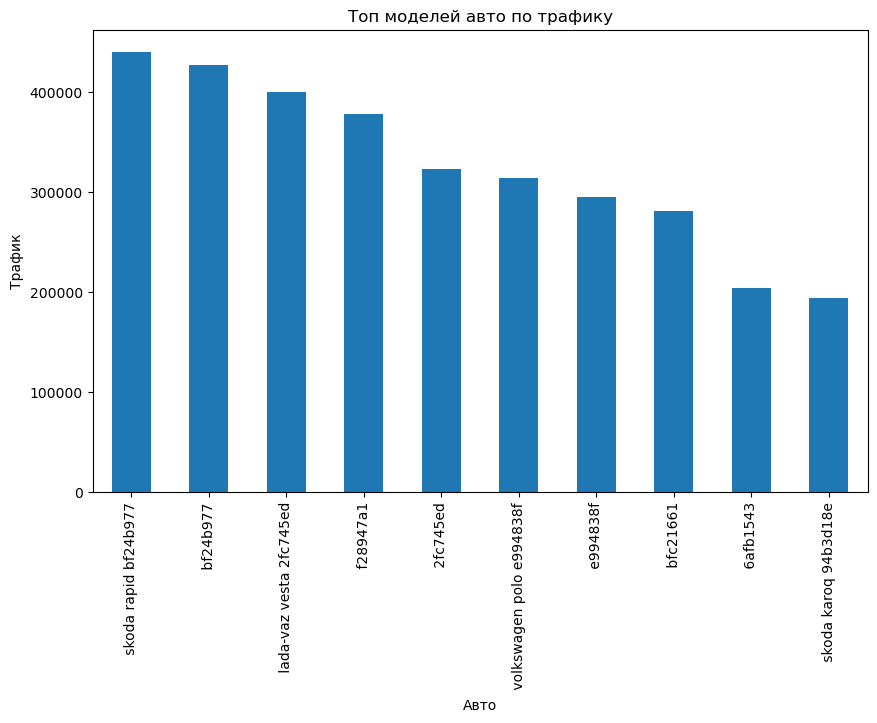

In [59]:
grouped_df_cars_traff = merged_dataset[merged_dataset['car_info'] != 'other page'].groupby(['car_info'])\
['client_id'].count().sort_values(ascending=False)
grouped_df_cars_traff = grouped_df_cars_traff[~grouped_df_cars_traff.index.str.contains('podpiska')].head(10)

plt.figure(figsize=(10, 6))
grouped_df_cars_traff.plot(kind='bar')
plt.xlabel('Авто')
plt.ylabel('Трафик')
plt.title('Топ моделей авто по трафику')
plt.show()

**Топ 10 машин с наибольшим количеством конверсий**

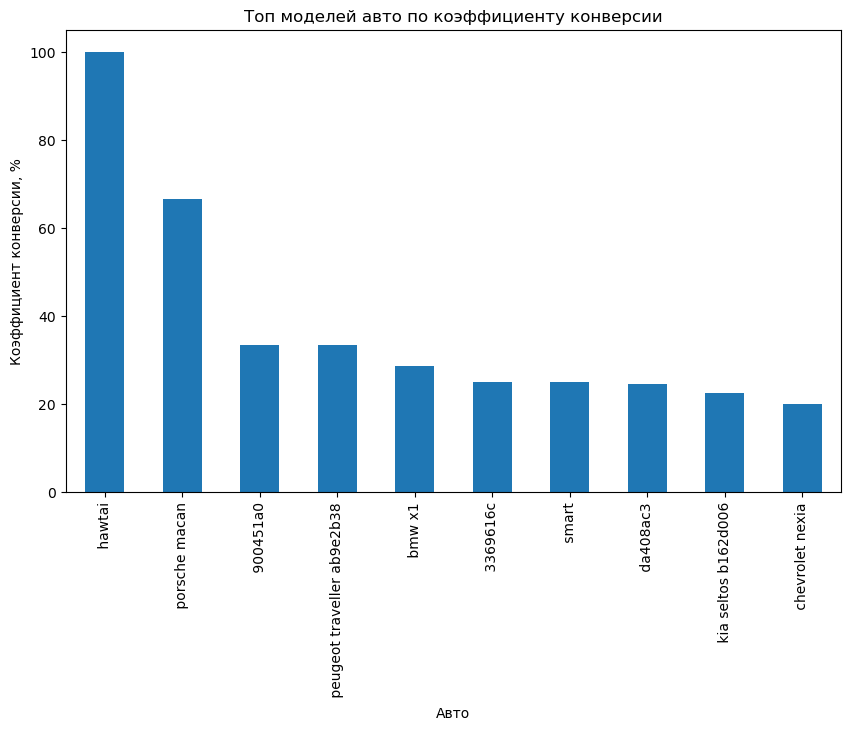

In [60]:
grouped_df_cars_cr = merged_dataset[merged_dataset['car_info'] != 'other page'].groupby(['car_info'])\
['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_cars_cr = grouped_df_cars_cr[~grouped_df_cars_cr.index.str.contains('podpiska')].head(10)

plt.figure(figsize=(10, 6))
grouped_df_cars_cr.plot(kind='bar')
plt.xlabel('Авто')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Топ моделей авто по коэффициенту конверсии')
plt.show()

**3) Определение потенциала соцсетей для масштабирования рекламы.**

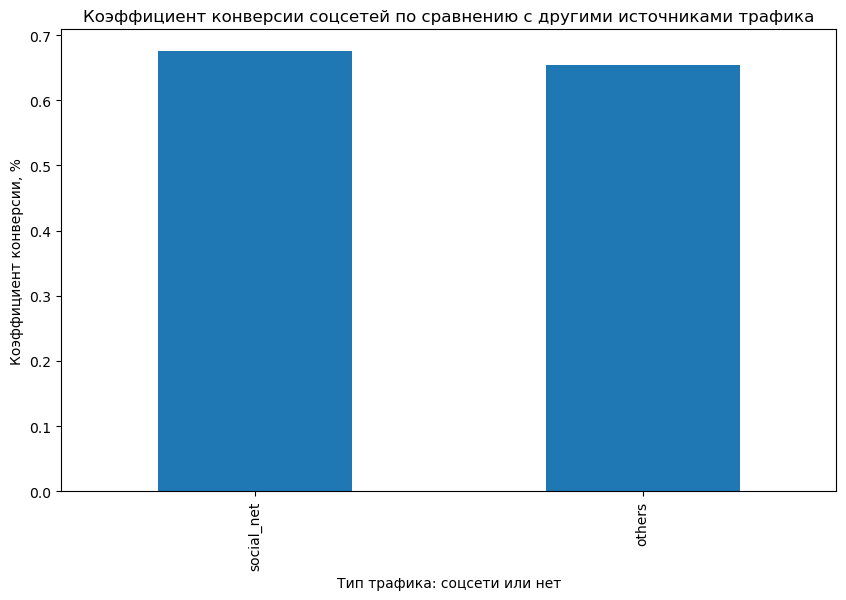

In [61]:
# Коэффициент конверсии соцсетей по сравнению с другими источниками трафика
grouped_df_social_and_others_cr = merged_dataset.groupby(['social'])['conversion_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_df_social_and_others_cr.plot(kind='bar')
plt.xlabel('Тип трафика: соцсети или нет')
plt.ylabel('Коэффициент конверсии, %')
plt.title('Коэффициент конверсии соцсетей по сравнению с другими источниками трафика')
plt.show()

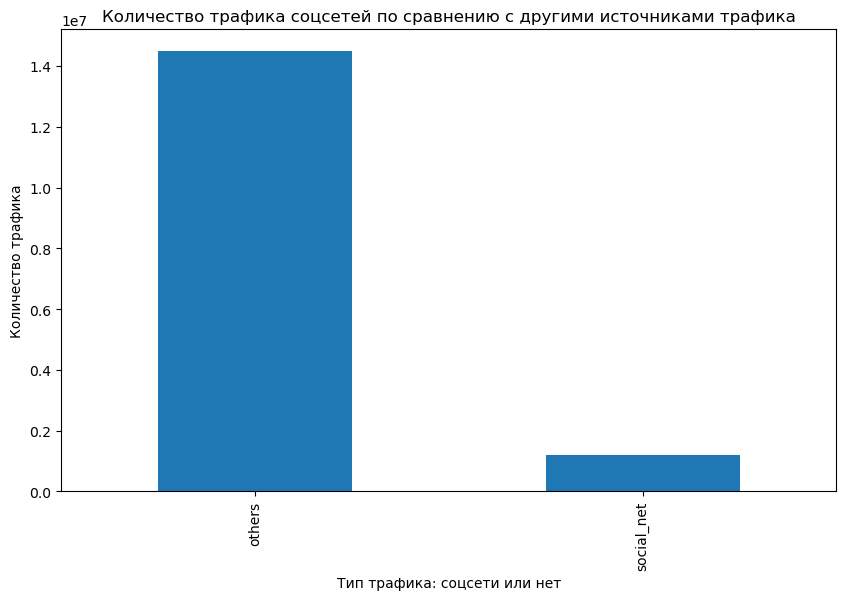

In [62]:
# Количество трафика соцсетей по сравнению с другими источниками трафика:
grouped_df_social_and_others_traff = merged_dataset.groupby(['social'])['client_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_df_social_and_others_traff.plot(kind='bar')
plt.xlabel('Тип трафика: соцсети или нет')
plt.ylabel('Количество трафика')
plt.title('Количество трафика соцсетей по сравнению с другими источниками трафика')
plt.show()

## Вывод

Коэффициент конверсии социальных сетей больше коэффициента конверсии других источников трафика на 0,02%. При этом количество трафика, получаемого из социальных сетей меньше в 10 раз по сравнению с другими источниками трафика.  
Социальные сети  имеют хороший потенциал и целесообразно увеличивать трафик с помощью SMM-продвижения и таргетированной рекламы.